In [5]:
# %load preface.py
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()



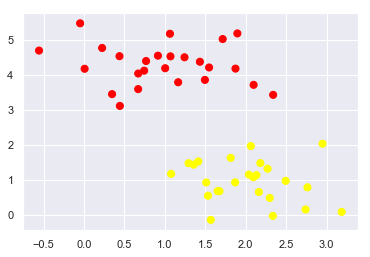

In [6]:
from sklearn.datasets.samples_generator import make_blobs
X,y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# Three simple classifier

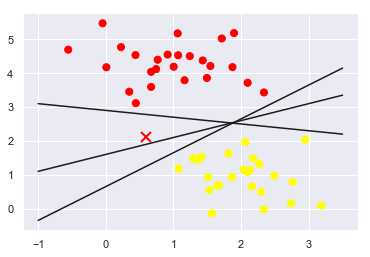

In [8]:
xfit=np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

# Visualize margins

(-1, 3.5)

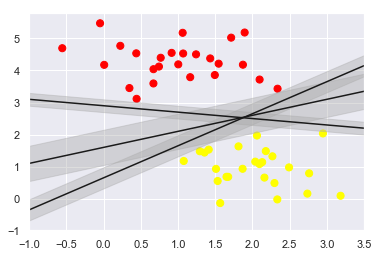

In [12]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

# Fitting a support vector 

In [13]:
from sklearn.svm import SVC # Support Vector Classifier
model = SVC(kernel='linear', C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## visualize it

In [16]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2d SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
              levels=[-1, 0, 1], alpha=0.5,
              linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                  model.support_vectors_[:, 1],
                  s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

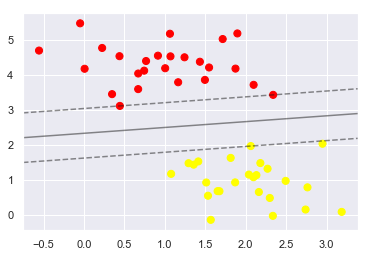

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [22]:
x = np.linspace(-0.5, 3, 5)
y = np.linspace(-0.5, 3, 5)
print('x = ', x)
print('y = ', y)
Y, X = np.meshgrid(y,x)
print('Y=', Y)
print('X=', X)

x =  [-0.5    0.375  1.25   2.125  3.   ]
y =  [-0.5    0.375  1.25   2.125  3.   ]
Y= [[-0.5    0.375  1.25   2.125  3.   ]
 [-0.5    0.375  1.25   2.125  3.   ]
 [-0.5    0.375  1.25   2.125  3.   ]
 [-0.5    0.375  1.25   2.125  3.   ]
 [-0.5    0.375  1.25   2.125  3.   ]]
X= [[-0.5   -0.5   -0.5   -0.5   -0.5  ]
 [ 0.375  0.375  0.375  0.375  0.375]
 [ 1.25   1.25   1.25   1.25   1.25 ]
 [ 2.125  2.125  2.125  2.125  2.125]
 [ 3.     3.     3.     3.     3.   ]]


In [23]:
X.ravel()

array([-0.5  , -0.5  , -0.5  , -0.5  , -0.5  ,  0.375,  0.375,  0.375,
        0.375,  0.375,  1.25 ,  1.25 ,  1.25 ,  1.25 ,  1.25 ,  2.125,
        2.125,  2.125,  2.125,  2.125,  3.   ,  3.   ,  3.   ,  3.   ,
        3.   ])

In [24]:
Y.ravel()

array([-0.5  ,  0.375,  1.25 ,  2.125,  3.   , -0.5  ,  0.375,  1.25 ,
        2.125,  3.   , -0.5  ,  0.375,  1.25 ,  2.125,  3.   , -0.5  ,
        0.375,  1.25 ,  2.125,  3.   , -0.5  ,  0.375,  1.25 ,  2.125,
        3.   ])

In [25]:
np.vstack([X.ravel(), Y.ravel()])

array([[-0.5  , -0.5  , -0.5  , -0.5  , -0.5  ,  0.375,  0.375,  0.375,
         0.375,  0.375,  1.25 ,  1.25 ,  1.25 ,  1.25 ,  1.25 ,  2.125,
         2.125,  2.125,  2.125,  2.125,  3.   ,  3.   ,  3.   ,  3.   ,
         3.   ],
       [-0.5  ,  0.375,  1.25 ,  2.125,  3.   , -0.5  ,  0.375,  1.25 ,
         2.125,  3.   , -0.5  ,  0.375,  1.25 ,  2.125,  3.   , -0.5  ,
         0.375,  1.25 ,  2.125,  3.   , -0.5  ,  0.375,  1.25 ,  2.125,
         3.   ]])

In [27]:
np.vstack([X.ravel(), Y.ravel()]).shape

(2, 25)

In [28]:
np.vstack([X.ravel(), Y.ravel()]).T

array([[-0.5  , -0.5  ],
       [-0.5  ,  0.375],
       [-0.5  ,  1.25 ],
       [-0.5  ,  2.125],
       [-0.5  ,  3.   ],
       [ 0.375, -0.5  ],
       [ 0.375,  0.375],
       [ 0.375,  1.25 ],
       [ 0.375,  2.125],
       [ 0.375,  3.   ],
       [ 1.25 , -0.5  ],
       [ 1.25 ,  0.375],
       [ 1.25 ,  1.25 ],
       [ 1.25 ,  2.125],
       [ 1.25 ,  3.   ],
       [ 2.125, -0.5  ],
       [ 2.125,  0.375],
       [ 2.125,  1.25 ],
       [ 2.125,  2.125],
       [ 2.125,  3.   ],
       [ 3.   , -0.5  ],
       [ 3.   ,  0.375],
       [ 3.   ,  1.25 ],
       [ 3.   ,  2.125],
       [ 3.   ,  3.   ]])

In [29]:
X.shape

(5, 5)

Text(0.5, 1.0, 'N = 60')

Text(0.5, 1.0, 'N = 120')

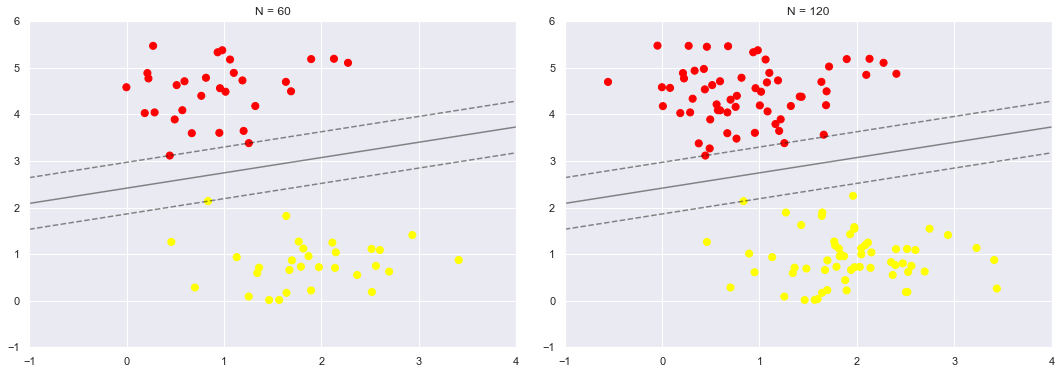

In [30]:

def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [31]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

# Beyond Linear, Kernel SVM

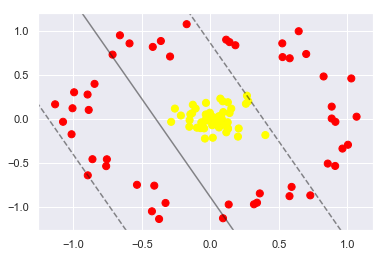

In [32]:

from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [33]:
r = np.exp(-(X ** 2).sum(1))


In [36]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 30, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', index=1, options=(-90, 30, 90), value=30), IntSlider(value=…

In [38]:

clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

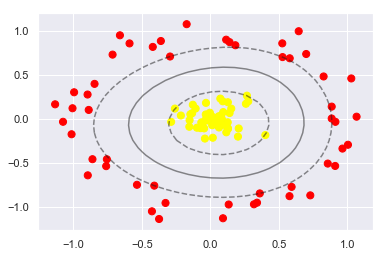

In [39]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');